In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

In [ ]:
data = {
    'ID': [1, 2, 3, 4, 5, 6],
    'Màu tóc': ['Đen', 'Đen', 'Râm', 'Nâu', 'Nâu', 'Râm'],
    'Chiều cao': ['Trung bình', 'Cao', 'Thấp', 'Thấp', 'Trung bình', 'Trung bình'],
    'Cân nặng': ['Nhẹ', 'Trung bình', 'Trung bình', 'Trung bình', 'Nặng', 'Nặng'],
    'Dùng kem': ['Không', 'Có', 'Có', 'Không', 'Không', 'Có'],
    'Kết quả': ['Cháy nắng', 'Không', 'Không', 'Cháy nắng', 'Cháy nắng', 'Không']
}
data = pd.DataFrame(data).set_index('ID')
print(data)

   Màu tóc   Chiều cao    Cân nặng Dùng kem    Kết quả
ID                                                    
1      Đen  Trung bình         Nhẹ    Không  Cháy nắng
2      Đen         Cao  Trung bình       Có      Không
3      Râm        Thấp  Trung bình       Có      Không
4      Nâu        Thấp  Trung bình    Không  Cháy nắng
5      Nâu  Trung bình        Nặng    Không  Cháy nắng
6      Râm  Trung bình        Nặng       Có      Không


## Tree 1

In [ ]:
data1 = {
    'ID': [1, 5, 2, 6, 5, 3],
    'Màu tóc': [2, 0, 2, 1, 0, 1],     # 'Đen':2  -  'Nâu':0  -  'Râm':1
    'Dùng kem': [1, 1, 0, 0, 1, 0],    # 'Có':1  -  'Không':0
    'Kết quả': [0, 0, 1, 1, 0, 1]      # 'Cháy nắng':0  -  'Không':1
}
data1 = pd.DataFrame(data1).set_index('ID')
print(data1)

    Màu tóc  Dùng kem  Kết quả
ID                            
1         2         1        0
5         0         1        0
2         2         0        1
6         1         0        1
5         0         1        0
3         1         0        1


In [ ]:
x_data = data1[["Màu tóc", "Dùng kem"]]
print(x_data)

y_train = data1["Kết quả"]
print(y_train)

    Màu tóc  Dùng kem
ID                   
1         2         1
5         0         1
2         2         0
6         1         0
5         0         1
3         1         0
ID
1    0
5    0
2    1
6    1
5    0
3    1
Name: Kết quả, dtype: int64


In [ ]:
# DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(max_depth=1, criterion='gini')
# dt_classifier.fit(x_data, y_train)  # still ok
dt_classifier.fit(x_data.values, y_train.values)

DecisionTreeClassifier(max_depth=1)

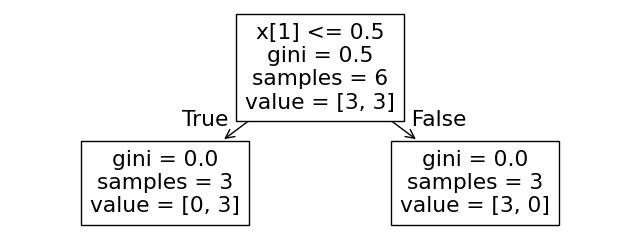

In [ ]:
from sklearn import tree

plt.figure(figsize=(8, 3))
tree.plot_tree(dt_classifier)
plt.show()

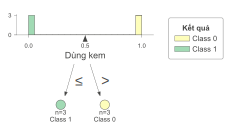

In [ ]:
import dtreeviz

viz_model = dtreeviz.model(dt_classifier,
                           X_train=x_data, y_train=y_train,
                           feature_names=['Màu tóc', 'Dùng kem'],
                           target_name='Kết quả')

viz_model.view()

## Tree 2

In [ ]:
'''
data = {
    'ID': [1, 2, 3, 4, 5, 6],
    'Màu tóc': ['Đen', 'Đen', 'Râm', 'Nâu', 'Nâu', 'Râm'],
    'Chiều cao': ['Trung bình', 'Cao', 'Thấp', 'Thấp', 'Trung bình', 'Trung bình'],
    'Cân nặng': ['Nhẹ', 'Trung bình', 'Trung bình', 'Trung bình', 'Nặng', 'Nặng'],
    'Dùng kem': ['Không', 'Có', 'Có', 'Không', 'Không', 'Có'],
    'Kết quả': ['Cháy nắng', 'Không', 'Không', 'Cháy nắng', 'Cháy nắng', 'Không']
}'''
data2 = {
    'ID': [4, 1, 6, 2, 4, 2],
    'Chiều cao': [1, 2, 2, 0, 1, 0],   # 'Thấp':1  -  'Trung bình':2  -  'Cao':0
    'Cân nặng': [2, 0, 1, 2, 2, 2],    # 'Trung bình':2  -  'Nhẹ':0  -  'Nặng':1
    'Kết quả': [0, 0, 1, 1, 0, 1]      # 'Cháy nắng':0  -  'Không':1
}
data2 = pd.DataFrame(data2).set_index('ID')
print(data2)

    Chiều cao  Cân nặng  Kết quả
ID                              
4           1         2        0
1           2         0        0
6           2         1        1
2           0         2        1
4           1         2        0
2           0         2        1


In [ ]:
x_data = data2[["Chiều cao", "Cân nặng"]]
print(x_data)

y_train = data2["Kết quả"]
print(y_train)

    Chiều cao  Cân nặng
ID                     
4           1         2
1           2         0
6           2         1
2           0         2
4           1         2
2           0         2
ID
4    0
1    0
6    1
2    1
4    0
2    1
Name: Kết quả, dtype: int64


In [ ]:
# DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(max_depth=1, criterion='gini')
dt_classifier.fit(x_data.values, y_train.values)

DecisionTreeClassifier(max_depth=1)

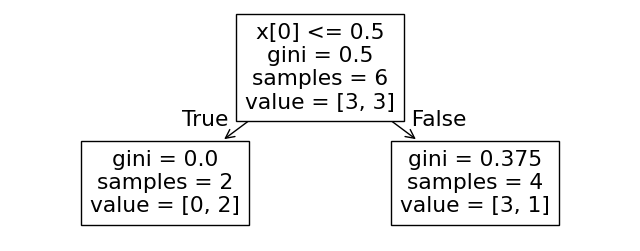

In [ ]:
from sklearn import tree

plt.figure(figsize=(8, 3))
tree.plot_tree(dt_classifier)
plt.show()

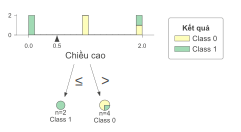

In [ ]:
import dtreeviz

viz_model = dtreeviz.model(dt_classifier,
                           X_train=x_data, y_train=y_train,
                           feature_names=["Chiều cao", "Cân nặng"],
                           target_name='Kết quả')

viz_model.view()